In [1]:
import importlib
import pandas as pd
import xarray as xr
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt

from ecpaper_utils import fig_utils as ecfig
from ecpaper_utils import bootstrap_utils as boot

importlib.reload(ecfig)

warnings.filterwarnings('ignore')

In [2]:
cmip5models = pd.read_csv("../DATASORT/cmip5csvinfo.csv")
cmip6models = pd.read_csv("../DATASORT/cmip6csvinfo.csv")

In [3]:
center5=cmip5models['Center']
center5set = set(center5)
center6=cmip6models['Center']
center6set = set(center6)

In [4]:
cmip5vwind = "/project/cas/islas/python/ecpaper2020/DATASORT/VWIND/DATA/cmip5vwindindices.nc"
cmip6vwind = "/project/cas/islas/python/ecpaper2020/DATASORT/VWIND/DATA/cmip6vwindindices.nc"
obs = "/project/cas/islas/python/ecpaper2020/DATASORT/VWIND/DATA/vampobs.nc"

In [6]:
cmip5dat = xr.open_dataset(cmip5vwind)
cmip6dat = xr.open_dataset(cmip6vwind)
obsdat = xr.open_dataset(obs)
psiobs = np.zeros([4])
psiobs[0] = obsdat.vamp_era5 ; psiobs[1] = obsdat.vamp_erai
psiobs[2] = obsdat.vamp_jra ; psiobs[3] = obsdat.vamp_merra

In [9]:
psi5 = cmip5dat['vpastamp_em'].assign_coords(Model=np.array(center5))
vdifsw5 = (cmip5dat['vfutsw_em'] - cmip5dat['vpastsw_em']).assign_coords(Model = np.array(center5))

psi6 = cmip6dat['vpastamp_em'].assign_coords(Model=np.array(center6))
vdifsw6 = (cmip6dat['vfutsw_em'] - cmip6dat['vpastsw_em']).assign_coords(Model = np.array(center6))

psi5m = psi5.groupby(psi5.Model).mean()
psi6m = psi6.groupby(psi6.Model).mean()
vdifsw5m = vdifsw5.groupby(vdifsw5.Model).mean()
vdifsw6m = vdifsw6.groupby(vdifsw6.Model).mean()

r5 = xr.corr(psi5m, vdifsw5m)
minr5, maxr5 = boot.boot_corr_ci(psi5m, vdifsw5m, 95)

r6 = xr.corr(psi6m, vdifsw6m)
minr6, maxr6 = boot.boot_corr_ci(psi6m, vdifsw6m, 95)

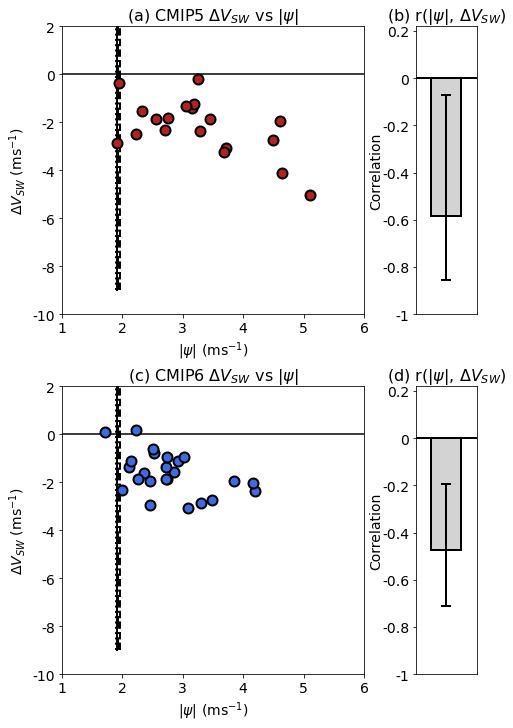

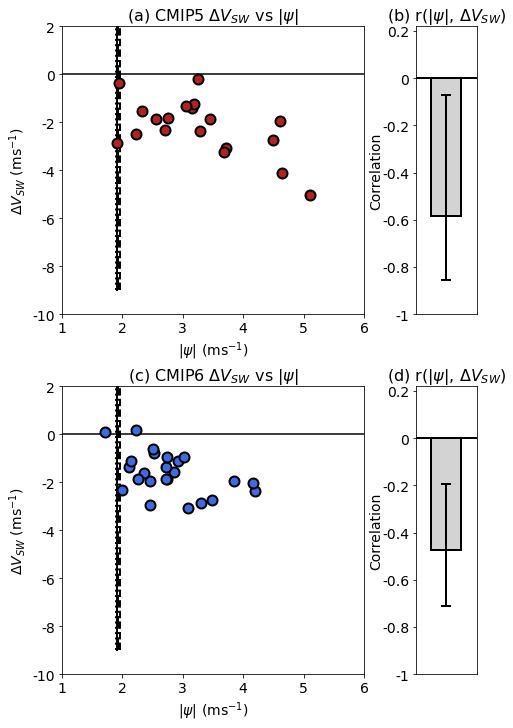

In [13]:
fig = plt.figure()
w=6 ; h=10
fig.set_size_inches(w, h)
ax1 = fig.add_axes(np.array([0.05,0.55,0.7,0.4]))
ax1 = ecfig.vwindscattersetup(ax1,'(a) CMIP5 $\Delta V_{SW}$ vs $|\psi|$')
ax1.plot([0,6],[0,0], color="black")
ax1.plot([obsdat["vamp_era5"], obsdat["vamp_era5"]],[-9,3], color="black", linewidth=2)
ax1.plot([obsdat["vamp_erai"], obsdat["vamp_erai"]],[-9,3], color="black", linestyle='dotted', linewidth=2)
ax1.plot([obsdat["vamp_jra"], obsdat["vamp_jra"]],[-9,3], color="black", linestyle='dashed', linewidth=2)
ax1.plot([obsdat["vamp_merra"], obsdat["vamp_merra"]],[-9,3],color="black", linestyle='dashdot', linewidth=2)
ax1.plot(psi5m, vdifsw5m,"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax2 = fig.add_axes(np.array([0.87,0.55,0.14,0.4]))
ax2.bar(1, r5, width=1, bottom=None, align='center', color='lightgray', edgecolor='black', linewidth=2)
ax2.set_xlim(0,2)
ax2.set_ylim(-1,0.22)
ax2.plot([0,2],[0,0], color='black', linewidth=2)
ax2.set_xticks([])
ax2.set_yticks([-1,-0.8,-0.6,-0.4,-0.2,0,0.2])
ax2.set_yticklabels(['-1','-0.8','-0.6','-0.4','-0.2','0','0.2'], fontsize=14)
ax2.set_ylabel('Correlation', fontsize=14, labelpad=-1)
ax2.errorbar(1, r5, [[r5-minr5], [maxr5-r5]], color='black', linewidth=2, capsize=5, capthick=2)
ax2.set_title('(b) r($|\psi|$, $\Delta V_{SW}$)', fontsize=16)

ax3 = fig.add_axes(np.array([0.05,0.05,0.7,0.4]))
ax3 = ecfig.vwindscattersetup(ax3,'(c) CMIP6 $\Delta V_{SW}$ vs $|\psi|$')
ax3.plot([0,6],[0,0], color="black")
ax3.plot([obsdat["vamp_era5"], obsdat["vamp_era5"]],[-10,3], color="black", linewidth=2)
ax3.plot([obsdat["vamp_erai"], obsdat["vamp_erai"]],[-10,3], color="black", linestyle='dotted', linewidth=2)
ax3.plot([obsdat["vamp_jra"], obsdat["vamp_jra"]],[-10,3], color="black", linestyle='dashed', linewidth=2)
ax3.plot([obsdat["vamp_merra"], obsdat["vamp_merra"]],[-10,3],color="black", linestyle='dashdot', linewidth=2)
ax3.plot(psi6m, vdifsw6m,"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax4 = fig.add_axes(np.array([0.87,0.05,0.14,0.4]))
ax4.bar(1, r6, width=1, bottom=None, align='center', color='lightgray', edgecolor='black', linewidth=2)
ax4.set_xlim(0,2)
ax4.set_ylim(-1,0.22)
ax4.plot([0,2],[0,0], color='black', linewidth=2)
ax4.set_xticks([])
ax4.set_yticks([-1,-0.8,-0.6,-0.4,-0.2,0,0.2])
ax4.set_yticklabels(['-1','-0.8','-0.6','-0.4','-0.2','0','0.2'], fontsize=14)
ax4.set_ylabel('Correlation', fontsize=14, labelpad=-1)
ax4.errorbar(1, r6, [[r6-minr6], [maxr6-r6]], color='black', linewidth=2, capsize=5, capthick=2)
ax4.set_title('(d) r($|\psi|$, $\Delta V_{SW}$)', fontsize=16)

fig
#fig.savefig('figs1.png', facecolor='white', bbox_inches='tight')